# Predicting Financial Distress of Companies

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [61]:
from sklearn.metrics import mean_squared_error
import seaborn as sns

Reading data from CSV <br>
Source: https://www.kaggle.com/shebrahimi/financial-distress

In [2]:
data=pd.read_csv("Financial Distress.csv")
print("Dataset Dimensions:",data.shape)
data.head()

Dataset Dimensions: (3672, 86)


,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


##### Checking for Na values in the data

In [3]:
print(data.isna().sum()[data.isna().sum()>0])

Series([], dtype: int64)


##### Cheking the datatypes of features in the dataset

In [4]:
set(data.dtypes)

{dtype('int64'), dtype('float64')}

##### Splitting our data into Train & Test (ratio 70:30)

In [5]:
Train_Features, Test_Features, Train_Results, Test_Results = train_test_split(data.loc[:,data.columns!="Financial "
                                                                                                     "Distress"],
                                                                              data["Financial Distress"].ravel(),
                                                                              train_size=0.7)
Train_data=data.iloc[Train_Features.index]

c:\users\aditya\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


##### Histogram of distinct values in the Feature Vectors

Time    14
x67     83
x72     27
x73     78
x77     70
x78     57
x80     37
x82     49
x83     69
dtype: int64


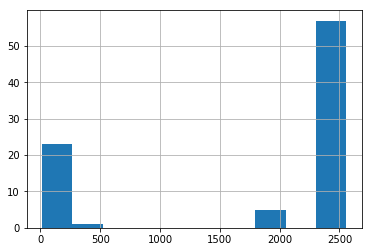

In [6]:
print(Train_data.apply(set).apply(len)[Train_data.apply(set).apply(len)<100])
Train_data.apply(set).apply(len).hist()

##### Correlation Matrix <br>
Using Pandas inbuilt corr function to generate the correlation matrix <br>
Retaining Features with absolute correlation to the Dependent Variable"Financial Distress" > 0.05

In [ ]:
Train_data.corr().loc[abs(Train_data.corr().loc["Financial Distress"])>0.05,:].sort_values("Financial Distress")

<Figure size 28800x28800 with 0 Axes>

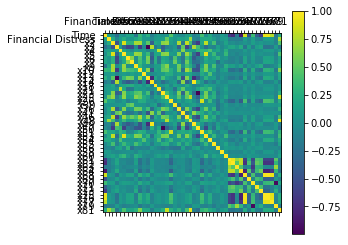

In [7]:
plt.figure(figsize=(400, 400))
plt.matshow(Train_data.corr().loc[abs(Train_data.corr().loc["Financial Distress"])>0.05,abs(Train_data.corr().loc["Financial Distress"])>0.05])
plt.xticks(range(data.corr().loc[abs(Train_data.corr().loc["Financial Distress"])>0.05,:].shape[0]), Train_data.corr().loc[abs(Train_data.corr().loc["Financial Distress"])>0.05,:].index)
plt.yticks(range(data.corr().loc[abs(Train_data.corr().loc["Financial Distress"])>0.05,:].shape[0]), Train_data.corr().loc[abs(Train_data.corr().loc["Financial Distress"])>0.05,:].index)
plt.colorbar()
plt.savefig("temp.png")
plt.show()

##### Feature Selection with Correlation >0.05

In [8]:
Train_Features=Train_Features[list(Train_data.corr().loc[abs(Train_data.corr().loc["Financial Distress"])>0.05,:].sort_values("Financial Distress").index)[:-1]]


In [19]:
Test_Features=Test_Features[list(Train_Features.columns)]

Comparing features obtained with highest correlation and features obtained with f_regression score

In [9]:
temp=SelectKBest(f_regression, k=Train_Features.shape[1]).fit(data.loc[:,data.columns!="Financial Distress"], data.loc[:,"Financial Distress"].ravel())
print("Different features obtained through f_regression score",set(data.loc[:,data.columns!="Financial Distress"].columns[temp.get_support()])-set(Train_Features.columns))
print("Different features obtained through correlation score",set(Train_Features.columns)-set(data.loc[:,data.columns!="Financial Distress"].columns[temp.get_support()]))

Different features obtained through f_regression score {'x37', 'x28', 'x24'}
Different features obtained through correlation score {'x56', 'x30', 'x7'}


In [58]:
model=Sequential()
model.add(Dense(100,activation='sigmoid',input_dim=Train_Features.shape[1]))
#model.add(Dense(50,activation='linear'))
#model.add(Dense(25,activation='linear'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

model.fit(Train_Features,Train_Results.ravel(),batch_size=50,epochs=10,validation_split=0.3)


Train on 1798 samples, validate on 772 samples
Epoch 1/10
1798/1798 [==============================] - 1s 310us/step - loss: 11.5500 - mean_squared_error: 11.5500 - val_loss: 1.6820 - val_mean_squared_error: 1.6820
Epoch 2/10
1798/1798 [==============================] - 0s 64us/step - loss: 10.8523 - mean_squared_error: 10.8523 - val_loss: 1.8368 - val_mean_squared_error: 1.8368
Epoch 3/10
1798/1798 [==============================] - 0s 74us/step - loss: 10.6720 - mean_squared_error: 10.6720 - val_loss: 1.9962 - val_mean_squared_error: 1.9962
Epoch 4/10
1798/1798 [==============================] - 0s 54us/step - loss: 10.5912 - mean_squared_error: 10.5912 - val_loss: 1.7776 - val_mean_squared_error: 1.7776
Epoch 5/10
1798/1798 [==============================] - 0s 57us/step - loss: 10.4026 - mean_squared_error: 10.4026 - val_loss: 1.8030 - val_mean_squared_error: 1.8030
Epoch 6/10
1798/1798 [==============================] - 0s 32us/step - loss: 10.3543 - mean_squared_error: 10.3543 - 

In [59]:
output=model.predict(Test_Features)

In [60]:
mean_squared_error(output,Test_Results.ravel())

2.775630868364568

In [68]:
type(output)

numpy.ndarray

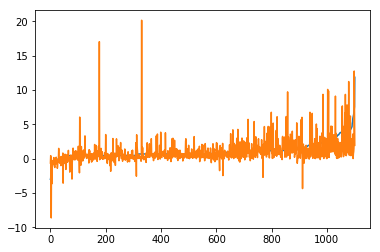

In [92]:
sns.lineplot(range(len(output)),sorted(output.flatten()))
sns.lineplot(range(len(output)),Test_Results.ravel()[sorted(range(len(output.flatten())),key=list(output.flatten()).__getitem__)])

In [93]:
Test_Results.ravel()[sorted(range(len(output.flatten())),key=list(output.flatten()).__getitem__)]

array([-0.6364  ,  0.44169 ,  0.041872, ..., 12.772   ,  6.1313  ,
        1.9459  ])

In [91]:
sorted(list(output.flatten()),key=list(output.flatten()).__getitem__)

[-2.9941657,
 -2.8247578,
 -2.0760083,
 -1.1382529,
 -1.0188311,
 -0.7401661,
 -0.41383585,
 -0.41382292,
 -0.41381747,
 -0.41381654,
 -0.41381654,
 -0.41381654,
 -0.41381642,
 -0.35194767,
 -0.3014275,
 -0.09853384,
 -0.097879246,
 -0.09787419,
 -0.09787331,
 -0.09787331,
 -0.09787331,
 -0.09787331,
 -0.09787331,
 -0.09787331,
 -0.09787331,
 -0.09787331,
 -0.09787331,
 -0.09787331,
 -0.09787331,
 -0.09787331,
 -0.09787331,
 -0.09787331,
 -0.09787331,
 -0.09787331,
 -0.09787331,
 -0.09787325,
 -0.09787295,
 -0.097872816,
 -0.09787261,
 -0.09787208,
 -0.097866885,
 -0.09785854,
 -0.09775338,
 -0.09773817,
 0.055185527,
 0.07618669,
 0.13863039,
 0.13928086,
 0.15184584,
 0.28557232,
 0.3724777,
 0.3839374,
 0.3849583,
 0.43816,
 0.438413,
 0.4507405,
 0.4530209,
 0.45310366,
 0.45312127,
 0.45330793,
 0.4533439,
 0.4534106,
 0.45341644,
 0.4534178,
 0.45341796,
 0.45341796,
 0.45341796,
 0.45341796,
 0.45341796,
 0.45341796,
 0.45341796,
 0.45341796,
 0.45341796,
 0.45341796,
 0.4534179